In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [29]:
df = pd.read_csv('winequality-red.csv') # Load the data

# The target variable is 'quality'.
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
# Split the data into train and test data:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X, Y)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

#### Variable Importance Plot — Global Interpretability

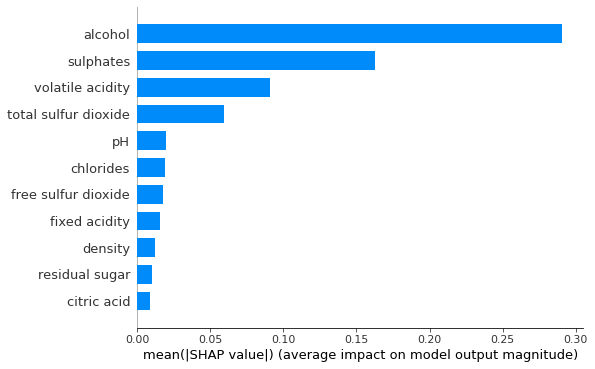

In [32]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

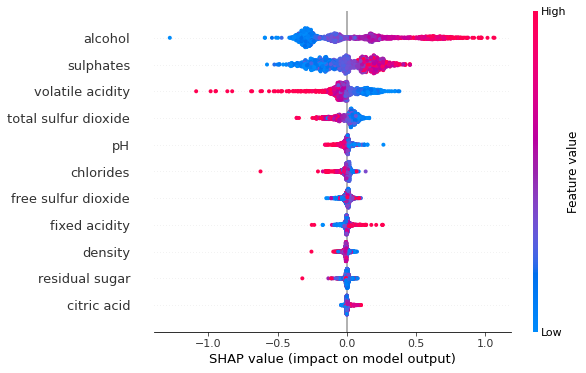

In [33]:
shap.summary_plot(shap_values, X)

> This plot is made of all the dots in the train data. It demonstrates the following information:

> Feature importance: Variables are ranked in descending order. <br>
> Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. <br>
> Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation. <br>
> Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “volatile acidity” is negatively correlated with the target variable.

#### SHAP Dependence Plot — Global Interpretability

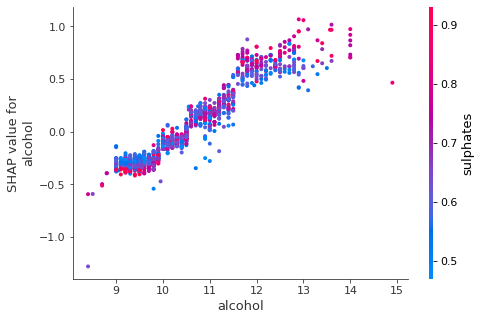

In [34]:
shap.dependence_plot('alcohol', shap_values, X)
# interaction_index = 'sulphates'
#interaction_index = 'volatile acidity'

#### Individual SHAP Value Plot — Local Interpretability

In [35]:
shap.initjs()

In [40]:
X_sample = df.iloc[495]
X_sample =  X_sample[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
print(X_sample)

fixed acidity           10.7000
volatile acidity         0.3500
citric acid              0.5300
residual sugar           2.6000
chlorides                0.0700
free sulfur dioxide      5.0000
total sulfur dioxide    16.0000
density                  0.9972
pH                       3.1500
sulphates                0.6500
alcohol                 11.0000
Name: 495, dtype: float64


In [44]:
explainerModel = shap.TreeExplainer(model)
indx = 391  # 495   1403  391       1062      1203
shap.force_plot(explainerModel.expected_value, shap_values[indx],X.iloc[indx])

>The output value is the prediction for that observation  is 6.04. <br>

>The base value: The original paper explains that the base value E(y_hat) is the mean prediction, or mean(yhat). You may wonder why it is 5.63. This is because the mean prediction of Y_test is 5.63. You can test it out by Y_test.mean() which produces 5.63.

> Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.


In [45]:
Y_train.mean()

5.64659890539484

In [42]:
X_train.mean()

fixed acidity            8.337373
volatile acidity         0.530000
citric acid              0.272181
residual sugar           2.553167
chlorides                0.087024
free sulfur dioxide     16.032838
total sulfur dioxide    47.114152
density                  0.996757
pH                       3.309828
sulphates                0.659077
alcohol                 10.413995
dtype: float64